In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.unicode_minus'] = False
import warnings
# 忽略所有警告
warnings.filterwarnings("ignore")

# 读取训练和测试数据
X_train = pd.read_excel('X_train_selected.xlsx')  # 读取训练数据的特征
y_train = pd.read_excel('ytrain.xlsx', index_col=0)  # 读取训练数据的标第一列作为索引
X_test = pd.read_excel('X_test_selected.xlsx')    # 读取测试数据的特征
y_test = pd.read_excel('ytest.xlsx', index_col=0)    # 读取测试数据的标签，第一列作为索引

OS :  
这一列表示患者的总生存时间，单位可能是天数或月数。它表示从患者开始治疗或诊断时，患者生存的总时长。在这个数据集中，OS 值（例如 43, 33, 32）表示患者的生存时间  
OS_State (Overall Survival State):  
这一列通常表示患者的生存状态。一般来说，它有两个可能的取值：0：表示患者仍然存活（censored, 即生存状态没有发生变化）。1：表示患者已经去世（死亡事件发生）。  
Sample: 这一列通常表示患者的样本编号或标识符。它有一个字母数字组合（例如 130P, 205P 等），这个编号可以是患者的唯一标识符。后面的 P 可能代表“Patient”（患者），而数字部分可能代表该患者的特定编号。  

In [2]:
y_train

,OS,OS_State,Sample
0,43,0,130P
1,33,0,205P
2,32,0,54P
3,35,0,222P
4,43,0,72P
...,...,...,...
116,47,0,49P
117,41,0,132P
118,1,1,161P
119,30,0,210P


In [3]:
# 从训练和测试数据中提取 "Sample" 列并将其删除
X_train_sample = X_train["Sample"]  # 提取训练数据中的 Sample 列
X_train = X_train.drop(["Sample"], axis=1)  # 删除训练数据中的 Sample 列
y_train = y_train.drop(["Sample"], axis=1)  # 删除训练标签中的 Sample 列

X_test_sample = X_test["Sample"]  # 提取测试数据中的 Sample 列
X_test = X_test.drop(["Sample"], axis=1)  # 删除测试数据中的 Sample 列
y_test = y_test.drop(["Sample"], axis=1)  # 删除测试标签中的 Sample 列

# 将标签转换为 NumPy 数组
y_train = np.array(y_train)
y_test = np.array(y_test)

# 输出训练和测试数据中生存和死亡的数量
print("Train/Test info:")
print("Train, survival-death:", np.unique(y_train[:, 1], return_counts=True))  # 输出训练数据中生存和死亡的数量
# 输出测试数据中生存和死亡的数量,np.unique()函数可以返回数组中唯一值及其计数，这样0和1的个数就可以得到
print("Test, survival-death:", np.unique(y_test[:, 1], return_counts=True))  # 输出测试数据中生存和死亡的数量

Train/Test info:
Train, survival-death: (array([0, 1], dtype=int64), array([97, 24], dtype=int64))
Test, survival-death: (array([0, 1], dtype=int64), array([50, 10], dtype=int64))


'cens':  
生存状态（布尔值）。False 表示患者存活（状态为 0），True 表示患者死亡（状态为 1）  
'time':  
生存时间（浮动类型）。表示患者的生存时间（单位通常是天数或月数）。例如，32. 表示患者生存了 32 天

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 处理训练标签数据
y_train = pd.DataFrame(y_train)  # 将训练标签转换为 DataFrame
y_train.columns = ["ST", "State"]  # 为 DataFrame 指定列名

# 显式将 "State" 列的类型转换为 int，再转换为 bool 类型
y_train.loc[:, "State"] = y_train.loc[:, "State"].astype(int).astype(bool)  # 将 "State" 列的数据类型转换为布尔值（True 表示生存，False 表示死亡）

# 创建一个结构化的 NumPy 数组，用于存储生存数据
train_data = np.zeros(len(y_train), dtype={'names': ('cens', 'time'), 'formats': ('?', '<f8')})  # 创建一个空的结构化数组，包含两列：'cens'（生存状态）和 'time'（生存时间）
train_data['cens'] = y_train.loc[:, "State"]  # 将 "State" 列数据存储到 "cens" 字段中，表示生存状态
train_data['time'] = y_train.loc[:, "ST"]  # 将 "ST" 列数据存储到 "time" 字段中，表示生存时间
y_train = train_data  # 将结构化数组赋值给 y_train

# 处理测试标签数据
y_test = pd.DataFrame(y_test)  # 将测试标签转换为 DataFrame
y_test.columns = ["ST", "State"]  # 为 DataFrame 指定列名

# 显式将 "State" 列的类型转换为 int，再转换为 bool 类型
y_test.loc[:, "State"] = y_test.loc[:, "State"].astype(int).astype(bool)  # 将 "State" 列的数据类型转换为布尔值（True 表示生存，False 表示死亡）

# 创建一个结构化的 NumPy 数组，用于存储生存数据
test_data = np.zeros(len(y_test), dtype={'names': ('cens', 'time'), 'formats': ('?', '<f8')})  # 创建一个空的结构化数组，包含两列：'cens'（生存状态）和 'time'（生存时间）
test_data['cens'] = y_test.loc[:, "State"]  # 将 "State" 列数据存储到 "cens" 字段中，表示生存状态
test_data['time'] = y_test.loc[:, "ST"]  # 将 "ST" 列数据存储到 "time" 字段中，表示生存时间
y_test = test_data  # 将结构化数组赋值给 y_test

y_test  # 返回处理后的测试标签数据

array([(False, 32.), (False, 41.), (False, 53.), (False, 56.),
       (False, 45.), (False, 36.), (False, 38.), (False, 35.),
       (False, 42.), (False, 51.), (False, 49.), (False, 32.),
       (False, 33.), (False, 46.), (False, 54.), ( True, 13.),
       (False,  4.), (False, 49.), (False, 25.), (False, 53.),
       ( True,  5.), (False, 55.), (False, 29.), ( True, 22.),
       (False, 30.), (False, 38.), (False, 40.), (False, 39.),
       (False, 50.), ( True, 51.), (False, 43.), (False, 33.),
       (False, 53.), (False, 52.), (False, 44.), (False, 31.),
       ( True,  3.), (False, 55.), ( True, 29.), (False, 48.),
       (False, 46.), ( True,  9.), (False, 34.), (False, 44.),
       ( True, 17.), (False, 33.), (False, 42.), (False, 44.),
       (False, 46.), (False, 29.), ( True, 34.), (False, 46.),
       (False, 46.), ( True, 11.), (False, 29.), (False, 28.),
       (False, 46.), (False, 54.), (False, 52.), (False, 33.)],
      dtype=[('cens', '?'), ('time', '<f8')])

In [5]:
from sksurv.ensemble import GradientBoostingSurvivalAnalysis

##### settings #####
random_state = 20  # 控制随机性，确保结果可复现
n_estimators = 1000  # 树的数量
learning_rate = 0.1  # 学习率
max_depth = 3  # 树的最大深度
min_samples_split = 10  # 内部节点划分所需的最小样本数
min_samples_leaf = 15  # 叶节点所需的最小样本数
max_features = "sqrt"  # 在寻找最佳划分时考虑的特征数量

# 使用生存梯度提升机拟合一个模型，并指定损失函数为"coxph"（Cox比例风险模型）
gbdt = GradientBoostingSurvivalAnalysis(n_estimators=n_estimators,  # 树的数量
                                        learning_rate=learning_rate,  # 学习率
                                        max_depth=max_depth,  # 最大树深度
                                        min_samples_split=min_samples_split,  # 最小样本数
                                        min_samples_leaf=min_samples_leaf,  # 最小叶子节点样本数
                                        max_features=max_features,  # 每次分裂时考虑的最大特征数
                                        random_state=random_state,  # 随机种子，确保结果可复现
                                        loss="coxph")  # 指定使用Cox比例风险模型作为损失函数

# 训练模型
gbdt.fit(X_train, y_train)  # 使用训练数据（Xtrain 和 ytrain）训练生存梯度提升机模型

GradientBoostingSurvivalAnalysis(max_features='sqrt', min_samples_leaf=15,
                                 min_samples_split=10, n_estimators=1000,
                                 random_state=20)

1. 为什么生存梯度提升机的临床可解释性差？    
（1）基于树的模型的非线性特性  
生存梯度提升机使用梯度提升树模型，它是一种非线性模型，通过多个决策树的集成来预测生存风险。  
树模型无法像线性模型那样直接给出每个特征对风险的“线性影响”（如 Cox 模型的 exp(β)）。  
（2）特征交互自动处理  
树模型会自动捕捉特征之间的复杂交互关系（如年龄和性别之间的交互），但这种交互关系是隐式的，无法像 Cox 模型那样通过系数直接表达  
（3）缺乏明确的统计推断  
Cox 模型可以提供 p 值、置信区间、风险比（HR） 等统计指标，便于进行假设检验。  
而生存梯度提升机只能提供 特征重要性，无法提供统计显著性信息。  
 2. Cox 模型的临床可解释性优势  
 （1）明确的系数解释  
 Cox 模型的系数可以直接解释为：  
exp(β) 表示该特征每增加一个单位，风险增加的倍数。  
例如：β = 0.5 表示该特征每增加一个单位，风险增加 exp(0.5) ≈ 1.65 倍。  
（2）统计显著性分析  
Cox 模型可以提供每个特征的 p 值，判断其是否对风险有显著影响。  
这在临床研究中非常重要，可以用于判断某个生物标志物是否具有统计学意义。  
（3）风险比（Hazard Ratio, HR）  
可以直接计算出每个特征的 风险比（HR），便于临床医生理解  
3. 生存梯度提升机的可解释性改进方法  
虽然生存梯度提升机的可解释性不如 Cox 模型，但可以通过以下方法提升其可解释性：  

（1）特征重要性分析（Feature Importance）  
可以使用模型自带的 feature_importances_ 属性，查看每个特征的重要性。  

示例代码：  
from sksurv.ensemble import GradientBoostingSurvivalAnalysis  

训练模型  
model = GradientBoostingSurvivalAnalysis()  
model.fit(X_train, y_train)  

获取特征重要性  
importance = model.feature_importances_  
临床意义：可以识别出哪些特征对预测结果影响最大，但无法判断是正向还是负向影响。  

（2）SHAP 值（SHapley Additive exPlanations）  
SHAP 是一种基于博弈论的解释方法，可以解释每个特征对预测结果的具体影响。  

示例代码：  
import shap  

使用 SHAP 解释器  
explainer = shap.TreeExplainer(model)  
shap_values = explainer.shap_values(X_test)  

可视化某个样本的 SHAP 值  
shap.initjs()  
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :])  
（3）部分依赖图（Partial Dependence Plot, PDP）  
可以展示某个特征对风险的影响趋势。  
 
示例代码：  
from sklearn.inspection import PartialDependenceDisplay  

绘制某个特征的 PDP  
PartialDependenceDisplay.from_estimator(model, X_train, features=[0])  
临床意义：可以判断某个特征对风险的影响是线性、非线性、还是存在阈值效应。  
Cox 模型 适合用于需要明确解释的研究（如新药疗效评估、生物标志物筛选）  
生存梯度提升机  适合用于预测建模（如患者预后预测、复发风险预测）

In [6]:
c_index = gbdt.score(X_test, y_test)
# 评估生存梯度提升机（GBDT-Survival）模型在测试数据集上的预测性能
f"{c_index:.5f}"

'0.74327'

In [7]:
X_test_sel = X_test.iloc[0:5,:]
X_test_sel

,SDMA-ADMA_pos-140,Thymine_pos-150,Neopterin_pos-117,Hydroxyproline_pos-095,Carnitine-C14_pos-049,Carnitine-C8_pos-056,Cystine_pos-068,AICAR_pos-034,Uridine_neg-088,N-Acetyl-D-glucosamine 6-phosphate_neg-061,...,S-(5'-Adenosyl)-L-homocysteine_neg-075,Phenylalanine_pos-127,NR_pos-175,Succinate_neg-079,2-Aminoadipic acid_pos-005,Isoleucine_pos-100,Glutamate_neg-044,Serotonin_pos-142,Inosine_pos-099,S-Adenosyl-methionine_pos-139
0,0.001227,0.000079,0.000054,0.000770,0.000015,0.001447,0.001787,0.000069,0.000554,0.000362,...,0.000010,0.111599,0.000087,0.000624,0.000367,0.078532,0.002082,0.006416,0.000068,0.001546
1,0.001372,0.000038,0.000117,0.000886,0.000008,0.002275,0.001504,0.000055,0.000369,0.000198,...,0.000009,0.117633,0.000083,0.000492,0.000333,0.109243,0.001870,0.001878,0.000247,0.000944
2,0.000749,0.000095,0.000060,0.000712,0.000003,0.001730,0.000558,0.000022,0.000201,0.000140,...,0.000027,0.124847,0.000103,0.001191,0.000194,0.123497,0.002272,0.000411,0.000030,0.000467
3,0.001234,0.000145,0.000041,0.001038,0.000335,0.002230,0.000955,0.000061,0.000523,0.000118,...,0.000014,0.136285,0.000128,0.000869,0.000176,0.062544,0.001284,0.001761,0.000237,0.000100
4,0.001414,0.000435,0.000080,0.001642,0.000036,0.002063,0.001385,0.000057,0.000530,0.000179,...,0.000009,0.118589,0.000166,0.000384,0.000323,0.090138,0.001067,0.001320,0.000298,0.000928


In [8]:
# gbdt 是已经训练好的模型，Xtest 是待预测的测试数据
# 如果 return_array=False（默认值）： 返回一个 StepFunction 对象，它是一个专门的对象，包含了累积风险函数的 x（时间点）和 y（对应的累积风险值）数组。
cumulative_hazard = gbdt.predict_cumulative_hazard_function(X_test_sel, return_array=True)

# 查看预测的累积风险函数
print(cumulative_hazard)

[[4.18294950e-04 1.06231464e-03 2.12185725e-03 3.66118774e-03
  1.52324305e-02 2.13767927e-02 3.73224209e-02 6.26067810e-02
  8.24188549e-02 8.24188549e-02 1.32952259e-01 1.69692745e-01
  2.16869748e-01 2.16869748e-01 2.16869748e-01 2.81823451e-01
  4.46826011e-01 4.46826011e-01 5.79179753e-01 5.79179753e-01
  5.79179753e-01 5.79179753e-01 5.79179753e-01 5.79179753e-01
  5.79179753e-01 5.79179753e-01 5.79179753e-01 5.79179753e-01
  5.79179753e-01 5.79179753e-01 8.50848485e-01 8.50848485e-01
  8.50848485e-01 8.50848485e-01 8.50848485e-01 8.50848485e-01
  8.50848485e-01 8.50848485e-01 8.50848485e-01 8.50848485e-01
  8.50848485e-01 8.50848485e-01]
 [3.67765441e-05 9.33988352e-05 1.86553954e-04 3.21892082e-04
  1.33923718e-03 1.87945028e-03 3.28139190e-03 5.50439599e-03
  7.24627600e-03 7.24627600e-03 1.16891792e-02 1.49194073e-02
  1.90672153e-02 1.90672153e-02 1.90672153e-02 2.47779529e-02
  3.92849986e-02 3.92849986e-02 5.09215560e-02 5.09215560e-02
  5.09215560e-02 5.09215560e-02 5.092

展示了不同样本的累积风险函数随时间的变化。累积风险是指某个事件（如死亡、疾病等）在给定时间内的累积概率或风险。横轴是时间（单位：天），纵轴是累积风险，表示随着时间推移，某一事件的发生风险逐渐增加。图中的每条曲线代表一个样本的风险变化，不同颜色的曲线分别代表不同的样本

蓝色曲线（157P）：  
这条曲线显示了该样本的累积风险随着时间迅速上升，表明该样本的风险在较短时间内急剧增加，可能意味着该样本较早出现事件的概率更高  
橙色曲线（124P）：  
相比于蓝色曲线，橙色曲线的累积风险增加较慢，表明该样本的风险上升更加平稳，事件发生的概率较为缓慢  
绿色曲线（52P）：  
绿色曲线的累积风险上升最为缓慢，表示该样本的风险增长非常平稳，风险的累积速度较低。  
红色曲线（295P）：  
红色曲线的累积风险上升速度稍快于绿色曲线，但仍然较为平缓，说明该样本的风险上升没有蓝色曲线那么迅速。  
紫色曲线（219P）：  
这条曲线显示了类似红色曲线的累积风险，表明其风险增长的趋势较为稳定

图中的曲线展示了每个样本在不同时间点的累积风险，曲线的斜率代表了风险增长的速度。通过这些曲线，可以比较不同样本的风险演变，了解哪些样本在较短时间内风险上升较快，哪些样本的风险上升较慢

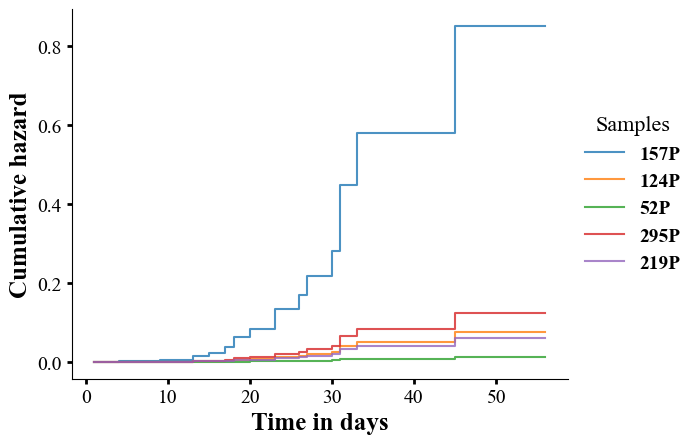

In [9]:
import matplotlib.font_manager as fm 

# 为每个样本绘制累积风险函数
for i, (s, sample_name) in enumerate(zip(cumulative_hazard, X_test_sample[0:5].tolist())):
    plt.step(gbdt.unique_times_, s, where="post", label=sample_name,alpha=0.8)  # 使用单个样本名称作为标签

# 添加图形标签和图例
plt.ylabel("Cumulative hazard", fontsize=18, fontweight='bold')  # 设置 y 轴标签的字体大小和加粗
plt.xlabel("Time in days", fontsize=18, fontweight='bold')  # 设置 x 轴标签的字体大小和加粗

# 去除顶部轴和最右边的轴
ax = plt.gca()  # 获取当前的坐标轴
ax.spines['top'].set_visible(False)  # 关闭顶部轴
ax.spines['right'].set_visible(False)  # 关闭最右边的轴

# 设置字体属性
font_properties = fm.FontProperties(weight='bold', size=14)

# 去除图例的边框，并将图例放置在右侧中间
plt.legend(title="Samples", frameon=False, loc='center left', bbox_to_anchor=(1, 0.5), prop=font_properties, title_fontsize=16)  # 图例放在右侧中间
# frameon=False：去除图例的边框 
# bbox_to_anchor=(1, 0.5)：第一个值1表示图例的x坐标位置（1表示坐标轴的右侧） 
# 第二个值0.5表示图例的y坐标位置（0.5表示坐标轴高度的一半）
# 设置坐标轴刻度标签的字体大小和加粗
plt.tick_params(axis='both', which='major', labelsize=14, labelcolor='black', width=2)
plt.savefig("1.pdf", format='pdf', bbox_inches='tight', dpi=1200)
plt.show()

预测生存函数

In [10]:
# 使用优化后的变量名
predicted_survival_functions = gbdt.predict_survival_function(X_test_sel, return_array=True)

# 查看预测的生存函数
print(predicted_survival_functions)

[[0.99958179 0.99893825 0.99788039 0.99634551 0.984883   0.97885007
  0.96336548 0.93931276 0.92088616 0.92088616 0.87550689 0.84392408
  0.80503482 0.80503482 0.80503482 0.75440686 0.63965519 0.63965519
  0.56035781 0.56035781 0.56035781 0.56035781 0.56035781 0.56035781
  0.56035781 0.56035781 0.56035781 0.56035781 0.56035781 0.56035781
  0.42705243 0.42705243 0.42705243 0.42705243 0.42705243 0.42705243
  0.42705243 0.42705243 0.42705243 0.42705243 0.42705243 0.42705243]
 [0.99996322 0.99990661 0.99981346 0.99967816 0.99866166 0.99812231
  0.99672399 0.99451073 0.99277991 0.99277991 0.98837887 0.98519134
  0.98111341 0.98111341 0.98111341 0.9755265  0.96147665 0.96147665
  0.95035322 0.95035322 0.95035322 0.95035322 0.95035322 0.95035322
  0.95035322 0.95035322 0.95035322 0.95035322 0.95035322 0.95035322
  0.92792283 0.92792283 0.92792283 0.92792283 0.92792283 0.92792283
  0.92792283 0.92792283 0.92792283 0.92792283 0.92792283 0.92792283]
 [0.99999374 0.9999841  0.99996824 0.9999452  

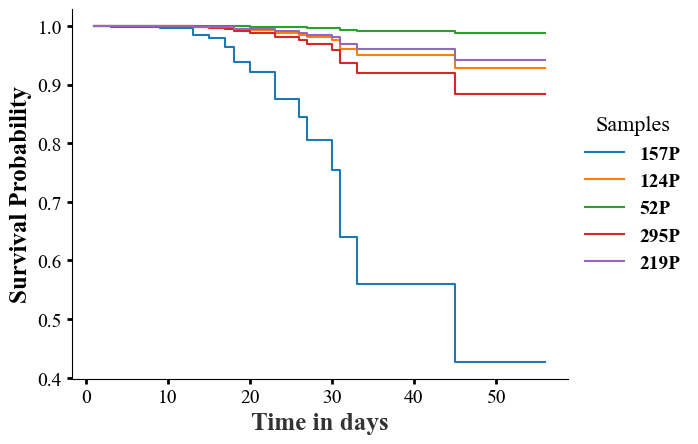

In [11]:
# 为每个样本绘制生存函数
for i, (s, sample_name) in enumerate(zip(predicted_survival_functions, X_test_sample[0:5].tolist())):
    plt.step(gbdt.unique_times_, s, where="post", label=sample_name)  # 使用单个样本名称作为标签

# 添加图形标签和图例
plt.ylabel("Survival Probability", fontsize=18, fontweight='bold')  # 设置 y 轴标签为生存概率
plt.xlabel("Time in days", fontsize=18, fontweight='bold',alpha=0.8)  # 设置 x 轴标签的字体大小和加粗

# 去除顶部轴和最右边的轴
ax = plt.gca()  # 获取当前的坐标轴
ax.spines['top'].set_visible(False)  # 关闭顶部轴
ax.spines['right'].set_visible(False)  # 关闭最右边的轴

# 设置字体属性
font_properties = fm.FontProperties(weight='bold', size=14)

# 去除图例的边框，并将图例放置在右侧中间
plt.legend(title="Samples", frameon=False, loc='center left', bbox_to_anchor=(1, 0.5), prop=font_properties, title_fontsize=16)  # 图例放在右侧中间

# 设置坐标轴刻度标签的字体大小和加粗
plt.tick_params(axis='both', which='major', labelsize=14, labelcolor='black', width=2)
# axis='both': 表示同时设置x轴和y轴的刻度参数
# which='major': 表示仅设置主刻度标签
# labelsize=14: 设置刻度标签的字体大小为14
# labelcolor='black': 刻度标签的字体颜色为黑色
# width=2: 刻度线的宽度为2
plt.savefig("2.pdf", format='pdf', bbox_inches='tight', dpi=1200)
plt.show()

In [12]:
# 计算特征重要性
from sklearn.inspection import permutation_importance

result = permutation_importance(gbdt, X_test, y_test, n_repeats=15, random_state=random_state)

# 将结果转换为 DataFrame 并按特征重要性排序
import pandas as pd

importance_df = pd.DataFrame(
    {
        k: result[k]
        for k in (
            "importances_mean",
            "importances_std",
        )
    },
    index=X_test.columns,
).sort_values(by="importances_mean", ascending=False)

importance_df

,importances_mean,importances_std
Thymine_pos-150,0.019186,0.019266
Carnitine-C12_pos-048,0.014769,0.021634
AICAR_pos-034,0.011318,0.007046
Succinate_neg-079,0.008144,0.026161
Hydroxyproline_pos-095,0.006901,0.009402
Carnitine-C8_pos-056,0.006625,0.006010
NR_pos-175,0.003313,0.007590
Carnitine-C14_pos-049,0.001656,0.003313
Glutamate_neg-044,0.001656,0.016094
7-Methylguanosine_pos-028,0.001518,0.006739


In [ ]:
# 使用训练好的 GBDT 模型 (gbdt_model) 来预测测试数据的风险分数
# `gbdt_model.predict(X_test)` 生成测试集 (X_test) 的风险分数
test_risk_scores = pd.Series(gbdt.predict(X_test))

# 提取测试数据中 "cens" 和 "time" 列，并转换数据类型
test_event_status = y_test["cens"].astype('int')  # 事件是否发生
test_survival_time = y_test['time'].astype('float')  # 生存时间

# 创建一个 DataFrame 来存储测试集的风险分数、生存时间、事件状态和样本编号
test_data = pd.DataFrame({
    "risk_score": test_risk_scores,
    "survival_time": test_survival_time,
    "event_status": test_event_status,
    "sample_id": X_test_sample
})

# 保存事件状态列，即生存/死亡（测试集）
test_event_status = test_event_status

# 对训练集进行同样的操作，获取训练集的风险分数
train_risk_scores = pd.Series(gbdt.predict(X_train))

# 提取训练数据中 "cens" 和 "time" 列，并转换数据类型
train_event_status = y_train["cens"].astype('int')  # 事件是否发生
train_survival_time = y_train['time'].astype('float')  # 生存时间

# 创建一个 DataFrame 来存储训练集的风险分数、生存时间、事件状态和样本编号
train_data = pd.DataFrame({
    "risk_score": train_risk_scores,
    "survival_time": train_survival_time,
    "event_status": train_event_status,
    "sample_id": X_train_sample
})

# 保存事件状态列，即生存/死亡（训练集）
train_event_status = train_event_status

In [ ]:
test_data.head()

,risk_score,survival_time,event_status,sample_id
0,1.926479,32.0,0,157P
1,-0.504847,41.0,0,124P
2,-2.275323,53.0,0,52P
3,0.001642,56.0,0,295P
4,-0.723065,45.0,0,219P


In [17]:
n_bootstraps = 1000  # 设置bootstrap次数

def CI(y_true, y_pred):
    bootstrapped_scores = []  # 存储每次bootstrap的分数
    print("auroc score:", roc_auc_score(y_true, y_pred))  # 输出ROC AUC得分
    rng = np.random.RandomState(rng_seed)  # 创建随机数生成器
    for i in range(n_bootstraps):  # 进行n_bootstraps次bootstrap
        # 通过有放回抽样获得预测索引
        indices = rng.randint(0, len(y_pred), len(y_pred))
        if len(np.unique(y_true[indices])) < 2:  # 如果样本中没有至少一个正类和一个负类，跳过
            continue

        score = roc_auc_score(y_true[indices], y_pred[indices])  # 计算ROC AUC得分
        bootstrapped_scores.append(score)  # 将得分加入列表
        #print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))  # 可选：输出每次的得分
    sorted_scores = np.array(bootstrapped_scores)  # 转换为NumPy数组
    sorted_scores.sort()  # 对得分进行排序

    # 计算90%的置信区间的下限和上限
    # 可以通过将百分位数改为0.025和0.975来计算95%的置信区间
    confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]  # 5%分位数作为下限
    confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]  # 95%分位数作为上限
    print("Confidence interval for the score: [{:0.3f} - {:0.3f}]".format(
        confidence_lower, confidence_upper))  # 输出置信区间
    return confidence_lower, confidence_upper  # 返回置信区间

auroc score: 0.748
Confidence interval for the score: [0.568 - 0.903]


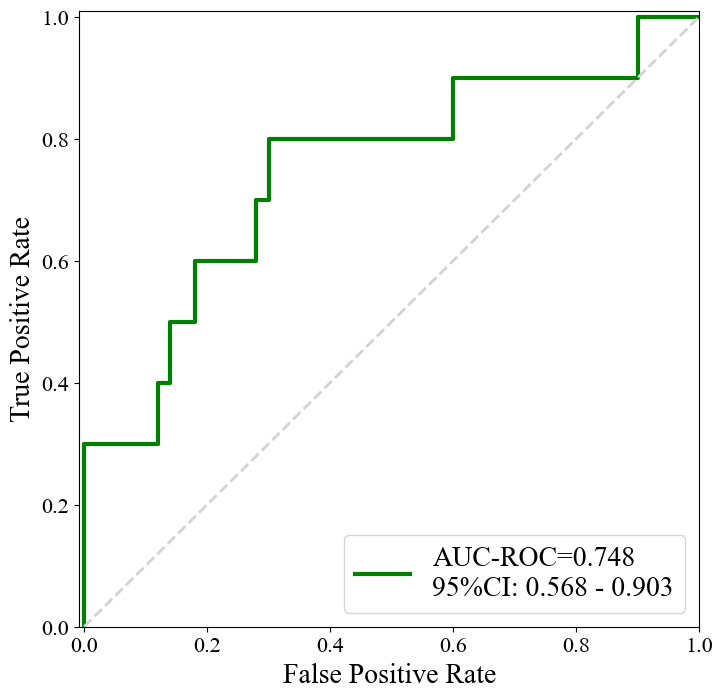

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
rng_seed = 10  # 设置随机种子
plot_name = "prognostic"  # 设置图表名称
plt.figure(figsize=(8, 8))  # 设置图形的大小
# 计算ROC曲线的假阳性率（fpr）和真正率（tpr）
fpr, tpr, _ = roc_curve(test_event_status, test_risk_scores)
#  _ 指的是阈值 thresholds，如果有的写出来，就会告诉我们阈值是多少，没有就是忽略这个返回值
# 而利用这个函数进行ROC曲线的绘制，则会不断的改变阈值，并计算出相应的FPR和TPR，从而得到ROC曲线，从而充分利用test_risk_scores
#计算原始的ROC AUC得分
raw = roc_auc_score(test_event_status, test_risk_scores)
# 计算95%的置信区间
r, l = CI(test_event_status, test_risk_scores)
# 格式化文本内容：显示AUROC和95%置信区间
tex = 'AUC-ROC={:0.3f}\n95%CI: {:0.3f} - {:0.3f}'.format(raw, r, l)
# 绘制ROC曲线，颜色为绿色，线宽加粗
plt.plot(fpr, tpr, lw=3, color='green', label=tex)
# 绘制参考的随机猜测线（45度线），颜色为浅灰色
plt.plot([0, 1], [0, 1], color='lightgray', lw=2, linestyle='--')
# 设置轴的范围
plt.xlim([-0.008, 1.0])
plt.ylim([0.0, 1.01])
# 设置x轴和y轴标签的字体大小
plt.xlabel('False Positive Rate', fontdict={'size': 20})
plt.ylabel('True Positive Rate', fontdict={'size': 20})
# 设置刻度标签的字体大小
plt.yticks(size=16)
plt.xticks(size=16)
plt.legend(loc="lower right", fontsize=20)
plt.savefig("3.pdf", format='pdf', bbox_inches='tight', dpi=1200)
plt.show()

绘制ROC曲线图使用的是风险分数，而不是预测概率

生存分析中C-index 和 AUC 的主要区别：  
1. 定义和计算方式不同  
C-index（Concordance Index）：  

专门用于生存分析的评估指标  
衡量模型对患者排序的准确性  
计算所有可比较患者对中，模型正确排序的比例  
对于一对患者，如果风险评分高的患者确实更早发生事件，则认为排序正确  
AUC（Area Under ROC Curve）：  

原本是用于二分类问题的评估指标  
衡量模型区分正负样本的能力  
通过计算ROC曲线下面积得到  
需要将生存分析问题转化为二分类问题才能计算  
C-index和AUC都是常用的评估指标，但C-index更适合于生存分析问题，AUC更适合于二分类问题  
C-index是一种常用的评估模型性能的指标，它可以计算模型在预测患者生存时间时，正确排序的比例。AUC（Area Under ROC Curve）是一种常用的评估二分类模型性能的指标，它可以计算模型在预测正负样本时，正确分类的比例。  
c_index = gbdt.score(X_test, y_test)  
这行代码直接使用了生存数据（时间和事件状态）计算C-index，是生存分析的标准评估方法。  
fpr, tpr, _ = roc_curve(test_event_status, test_risk_scores)  
raw = roc_auc_score(test_event_status, test_risk_scores)  
这里需要将生存数据转化为二分类问题的形式：  
 1. 将事件状态转换为二分类问题，即将事件发生（1）转换为正样本（1），将事件未发生（0）转换为负样本（0）。  
 2. 将生存时间转化为二分类问题，即将生存时间小于等于某个阈值（如5年）的样本转换为正样本（1），将生存时间大于某个阈值（如5年）的样本转换为负样本（0）。  
test_event_status：事件状态（通常是二分类：发生事件/未发生事件）  
test_risk_scores：风险评分（通常是模型输出的风险值）  



fpr, tpr, _ = roc_curve(test_event_status, test_risk_scores)为什么这个可以返回多个真阳性率，多个假阳性率，理论上一组数据的预测结果和真实结果摆在这，就应该是只有一个混淆矩阵，所以就只有一个真阳性率和一个假阳性率的啊  
传统分类 vs ROC曲线分类：  
传统分类（单个阈值）：    
例如，固定阈值=0.5  
threshold = 0.5  
predictions = (test_risk_scores >= 0.5).astype(int)  # 只有一次分类  
只能得到一个混淆矩阵，一个TPR，一个FPR  
ROC曲线分类（多个阈值）：  
使用所有可能的阈值  
unique_scores = np.unique(test_risk_scores)  # [0.1, 0.35, 0.4, 0.6, 0.8]  
对每个阈值都进行一次分类，得到多个混淆矩阵  
因此得到多个TPR和FPR值  
ROC曲线：  
ROC曲线是一个TPR和FPR的曲线  
TPR = TP / (TP + FN)  
FPR = FP / (FP + TN)  
ROC曲线的X轴是FPR，Y轴是TPR  
ROC曲线越向右，越向上，越接近（1，1）  
ROC曲线越向左，越向下，越接近（0，0）  
你的理解在单个阈值情况下是正确的：一组预测结果和真实结果确实只对应一个混淆矩阵，一个TPR和一个FPR。  

但ROC曲线的特殊之处在于：  

它不是使用一个固定阈值  
而是自动尝试多个不同的阈值（通常是每个唯一的预测分数作为一个阈值）  
对每个阈值都进行一次完整的分类评估  
因此得到多个混淆矩阵，多个TPR和FPR值  
这些(TPR, FPR)点连接起来就形成了ROC曲线  


为什么我发现在ROC曲线中在真阳性率接近1的时候假阳性率也接近1呢  
核本原因：阈值趋近于0时的现象  
当ROC曲线的真正率接近1时，通常意味着分类阈值非常低，接近于0，这会导致几乎所有样本都被预测为正类。  
数学上的必然性  
当阈值非常低（接近0）时：  

几乎所有样本的预测分数都 >= 阈值  
因此几乎所有样本都被预测为正类  
这导致：  
TPR ≈ 1（几乎所有正例都被检测到）  
FPR ≈ 1（几乎所有负例都被误报）  
实际意义：  
这种现象在实际中是有意义的：  

高TPR但高FPR的情况在医学诊断中很常见：  

为了不漏诊（高TPR），可能需要降低诊断标准  
但这会导致更多误诊（高FPR）  
这是ROC曲线的本质特征：  

ROC曲线展示了在所有可能的分类阈值下模型的权衡  
完美的分类器会尽可能靠近左上角(0,1)  
随机分类器的ROC曲线是连接(0,0)和(1,1)的对角线  

ROC曲线的AUC值越大，模型越接近完美的分类器  
AUC值越小，模型越接近随机分类器  

AUC值越接近1，模型越接近完美的分类器  
AUC值越接近0.5，模型越接近随机分类器  

AUC值越接近0.5，模型越接近随机分类器  
AUC值越接近0，模型越接近最差分类器  


In [20]:
print("实际应用中的解读:")
print("=" * 30)
print("当ROC曲线上某点接近(1,1)时:")
print("  ✅ 优点: 几乎所有真正的患者都被检测出来了(TPR≈1)")
print("  ❌ 缺点: 同时也有很多健康人被误诊为患者(FPR≈1)")
print("  💡 应用: 适用于不能漏诊的场景(如癌症筛查)")
print("  ⚠️  注意: 需要考虑成本效益平衡")

实际应用中的解读:
当ROC曲线上某点接近(1,1)时:
  ✅ 优点: 几乎所有真正的患者都被检测出来了(TPR≈1)
  ❌ 缺点: 同时也有很多健康人被误诊为患者(FPR≈1)
  💡 应用: 适用于不能漏诊的场景(如癌症筛查)
  ⚠️  注意: 需要考虑成本效益平衡
